# Notes
- Last updated April 2, 2019

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
# Get counties
top_county_file = "Zillow CSV results/top_counties_Sale_List_Ratio.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "Zillow CSV results/bottom_counties_Sale_List_Ratio.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['StateName']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)
top_county_clean

,County
0,"La Porte, IN"
1,"Bannock, ID"
2,"Douglas, KS"
3,"Medina, TX"
4,"Weber, UT"
5,"Bell, TX"
6,"Davis, UT"
7,"Alameda, CA"
8,"Kootenai, ID"
9,"Campbell, WY"


In [4]:
# Clean up counties (Bottom)
bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['StateName']

bottom_county_clean = bottom_county_df[['County']]
bottom_county_clean

,County
0,"Sullivan, NY"
1,"Garrett, MD"
2,"Saint Lawrence, NY"
3,"Cattaraugus, NY"
4,"Douglas, WI"
5,"Jefferson, NY"
6,"Pike, PA"
7,"Curry, OR"
8,"Luzerne, PA"
9,"Cumberland, TN"


In [5]:
# Get health factor data and clean up
health_factor_path = "raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

In [6]:
# Get health factor data 2 and clean up
health_factor_path2 = "raw data/2018_all_county_data_2.csv"
health_factor_df2 = pd.read_csv(health_factor_path2, encoding="latin")

health_factor_df2["State"] = health_factor_df2["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df2['County'] = health_factor_df2["County"] + ", " + health_factor_df2["State"]

# Percent Diabetic

In [7]:
# Specific health factor 
diabetic = health_factor_df2[["County", "% Diabetic"]]
diabetic.head()

,County,% Diabetic
0,"Autauga, AL",12
1,"Baldwin, AL",11
2,"Barbour, AL",18
3,"Bibb, AL",15
4,"Blount, AL",14


In [8]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, diabetic, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, diabetic, on='County', how='left')
bottom_county_data.head()


,County,% Diabetic
0,"Sullivan, NY",11.0
1,"Garrett, MD",13.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",9.0
4,"Douglas, WI",9.0


In [9]:
# Get p-value

pop1 = top_county_data['% Diabetic']
pop2 = bottom_county_data["% Diabetic"]
pop1.fillna(0, inplace=True)
pop2.fillna(0, inplace=True)
ttest_diabetes = stats.ttest_ind(pop1, pop2, equal_var=False)

# Get p-value to look cleaner
if ttest_diabetes[1] <0.001:
    pvalue_diabetes = '{0:.1e}'.format(ttest_diabetes[1])
else:
    pvalue_diabetes = '{0:.3f}'.format(ttest_diabetes[1])
pvalue_diabetes



'5.6e-04'

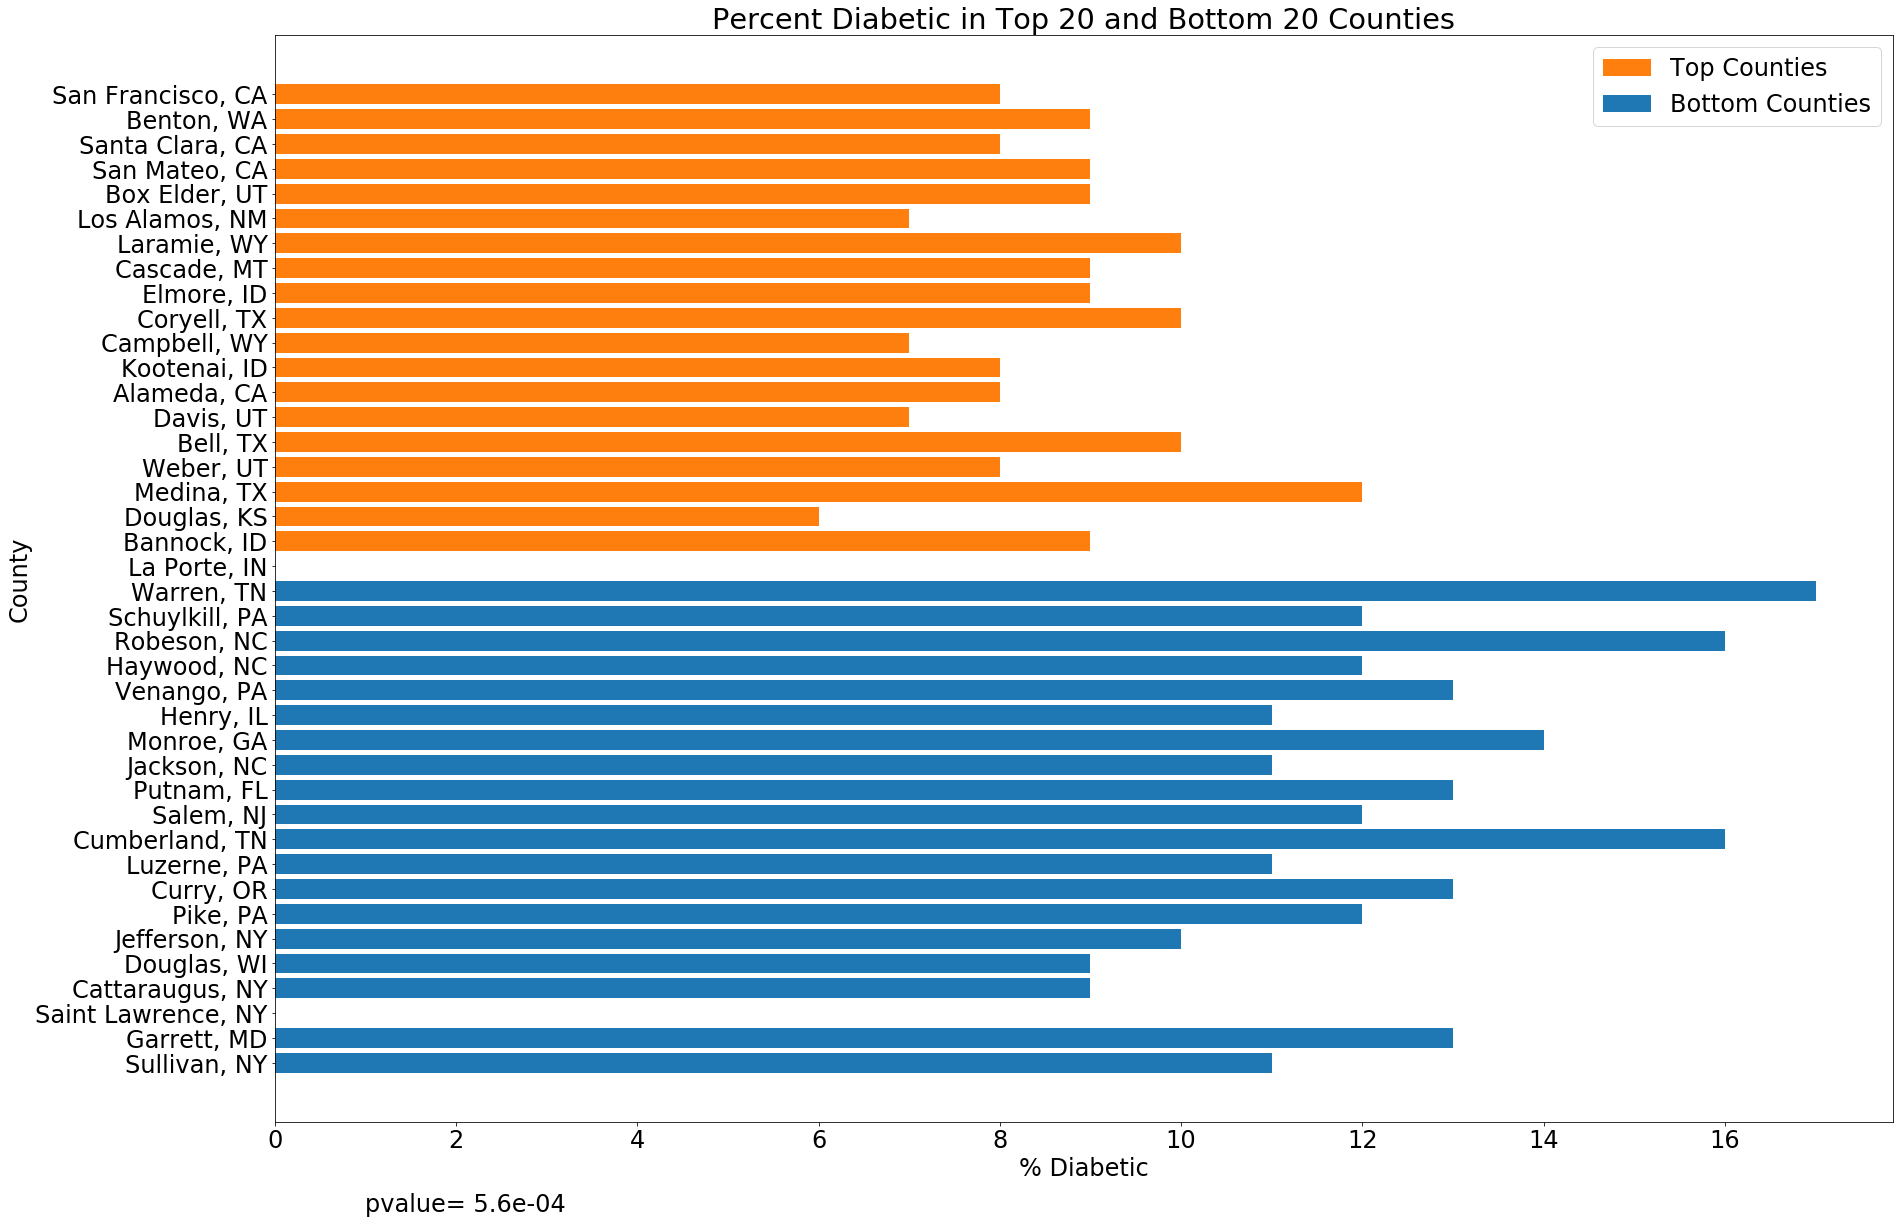

In [10]:
# Plot
plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot= plt.barh(bottom_county_data['County'], bottom_county_data['% Diabetic'])
top_plot= plt.barh(top_county_data['County'], top_county_data['% Diabetic'])
plt.title("Percent Diabetic in Top 20 and Bottom 20 Counties")
plt.xlabel("% Diabetic")
plt.ylabel("County")
plt.text(1,-6,"pvalue= " + pvalue_diabetes)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='upper right')
plt.savefig("plot/plot_SL_Diabetic.png")





# Percent Uninsured

In [11]:
# Specific health factor 
uninsured_rate = health_factor_df[["County", "% Uninsured"]]
uninsured_rate.head()

,County,% Uninsured
0,"Autauga, AL",9.0
1,"Baldwin, AL",12.0
2,"Barbour, AL",13.0
3,"Bibb, AL",12.0
4,"Blount, AL",14.0


In [12]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data.head()

,County,% Uninsured
0,"Sullivan, NY",9.0
1,"Garrett, MD",8.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",8.0
4,"Douglas, WI",7.0


In [13]:
# Get p-value
pop1 = top_county_data['% Uninsured']
pop2= bottom_county_data["% Uninsured"]
pop1.fillna(0, inplace=True)
pop2.fillna(0, inplace=True)
ttest_uninsured= stats.ttest_ind(pop1, pop2, equal_var=False)


# Get p-value to look cleaner
if ttest_uninsured[1] <0.001:
    pvalue_uninsured = '{0:.1e}'.format(ttest_uninsured[1])
else:
    pvalue_uninsured = '{0:.3f}'.format(ttest_uninsured[1])
pvalue_uninsured



'0.557'

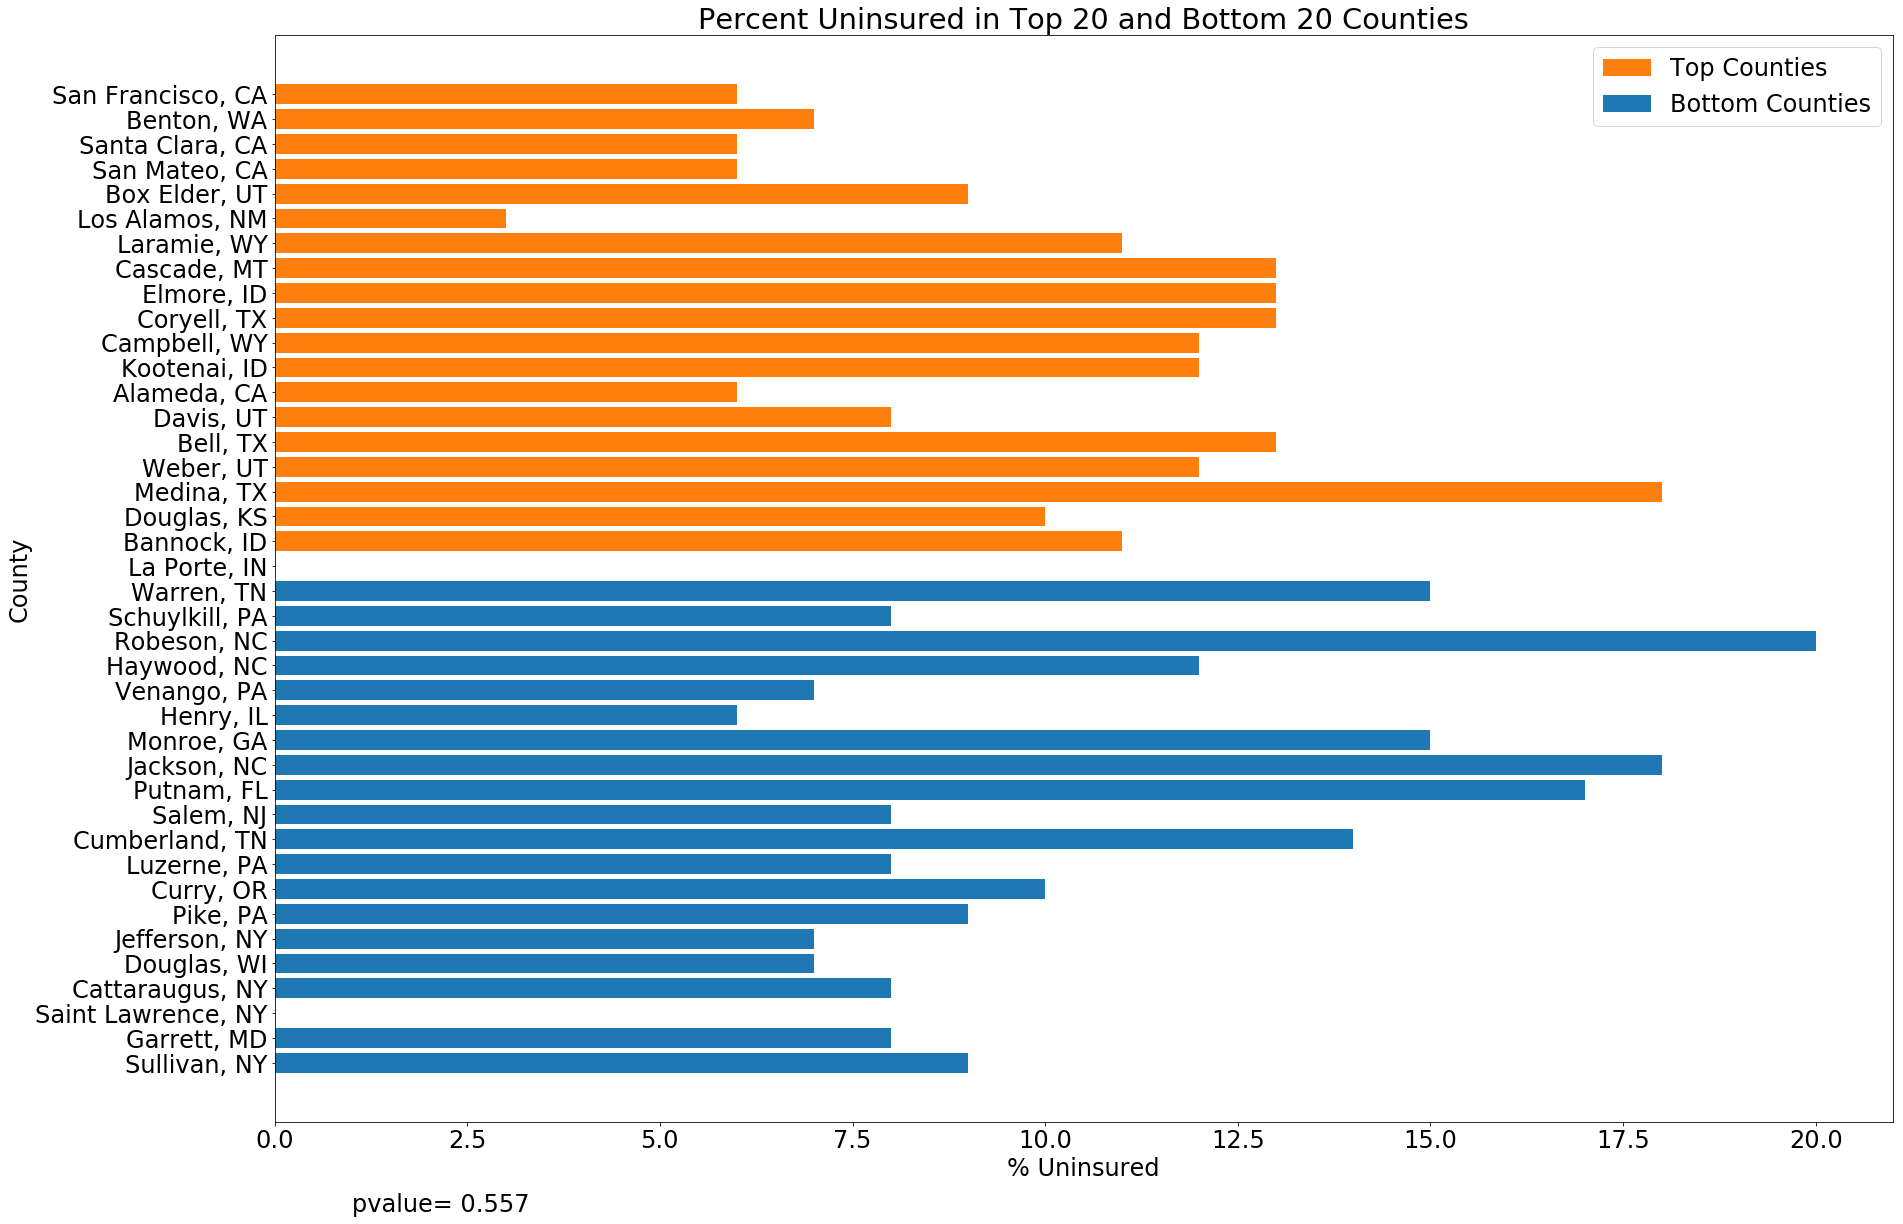

In [14]:
# Plot
plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['% Uninsured'])

top_plot=plt.barh(top_county_data['County'], top_county_data['% Uninsured'])

plt.title("Percent Uninsured in Top 20 and Bottom 20 Counties")
plt.xlabel("% Uninsured")
plt.ylabel("County")
plt.text(1,-6,"pvalue= " + pvalue_uninsured)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='upper right')           
plt.savefig("plot/plot_SL_Uninsured.png")








# PCP Rate
primary care physician per 100,000 population

In [15]:
# Get specific health factor data

PCP_rate_df = health_factor_df[["County", "PCP Rate"]]
PCP_rate_df.head()

,County,PCP Rate
0,"Autauga, AL",45.0
1,"Baldwin, AL",73.0
2,"Barbour, AL",42.0
3,"Bibb, AL",53.0
4,"Blount, AL",21.0


In [16]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data.head()

,County,PCP Rate
0,"Sullivan, NY",39.0
1,"Garrett, MD",54.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",49.0
4,"Douglas, WI",18.0


In [17]:
# Get p-value

pop1 = top_county_data['PCP Rate']
pop2= bottom_county_data['PCP Rate']
pop1.fillna(0, inplace=True)
pop2.fillna(0, inplace=True)
ttest_PCP_Rate= stats.ttest_ind(pop1, pop2, equal_var=False)


# Get p-value to look cleaner
if ttest_PCP_Rate[1] <0.001:
    pvalue_PCP_Rate = '{0:.1e}'.format(ttest_PCP_Rate[1])
else:
    pvalue_PCP_Rate = '{0:.3f}'.format(ttest_PCP_Rate[1])
pvalue_PCP_Rate



'0.043'

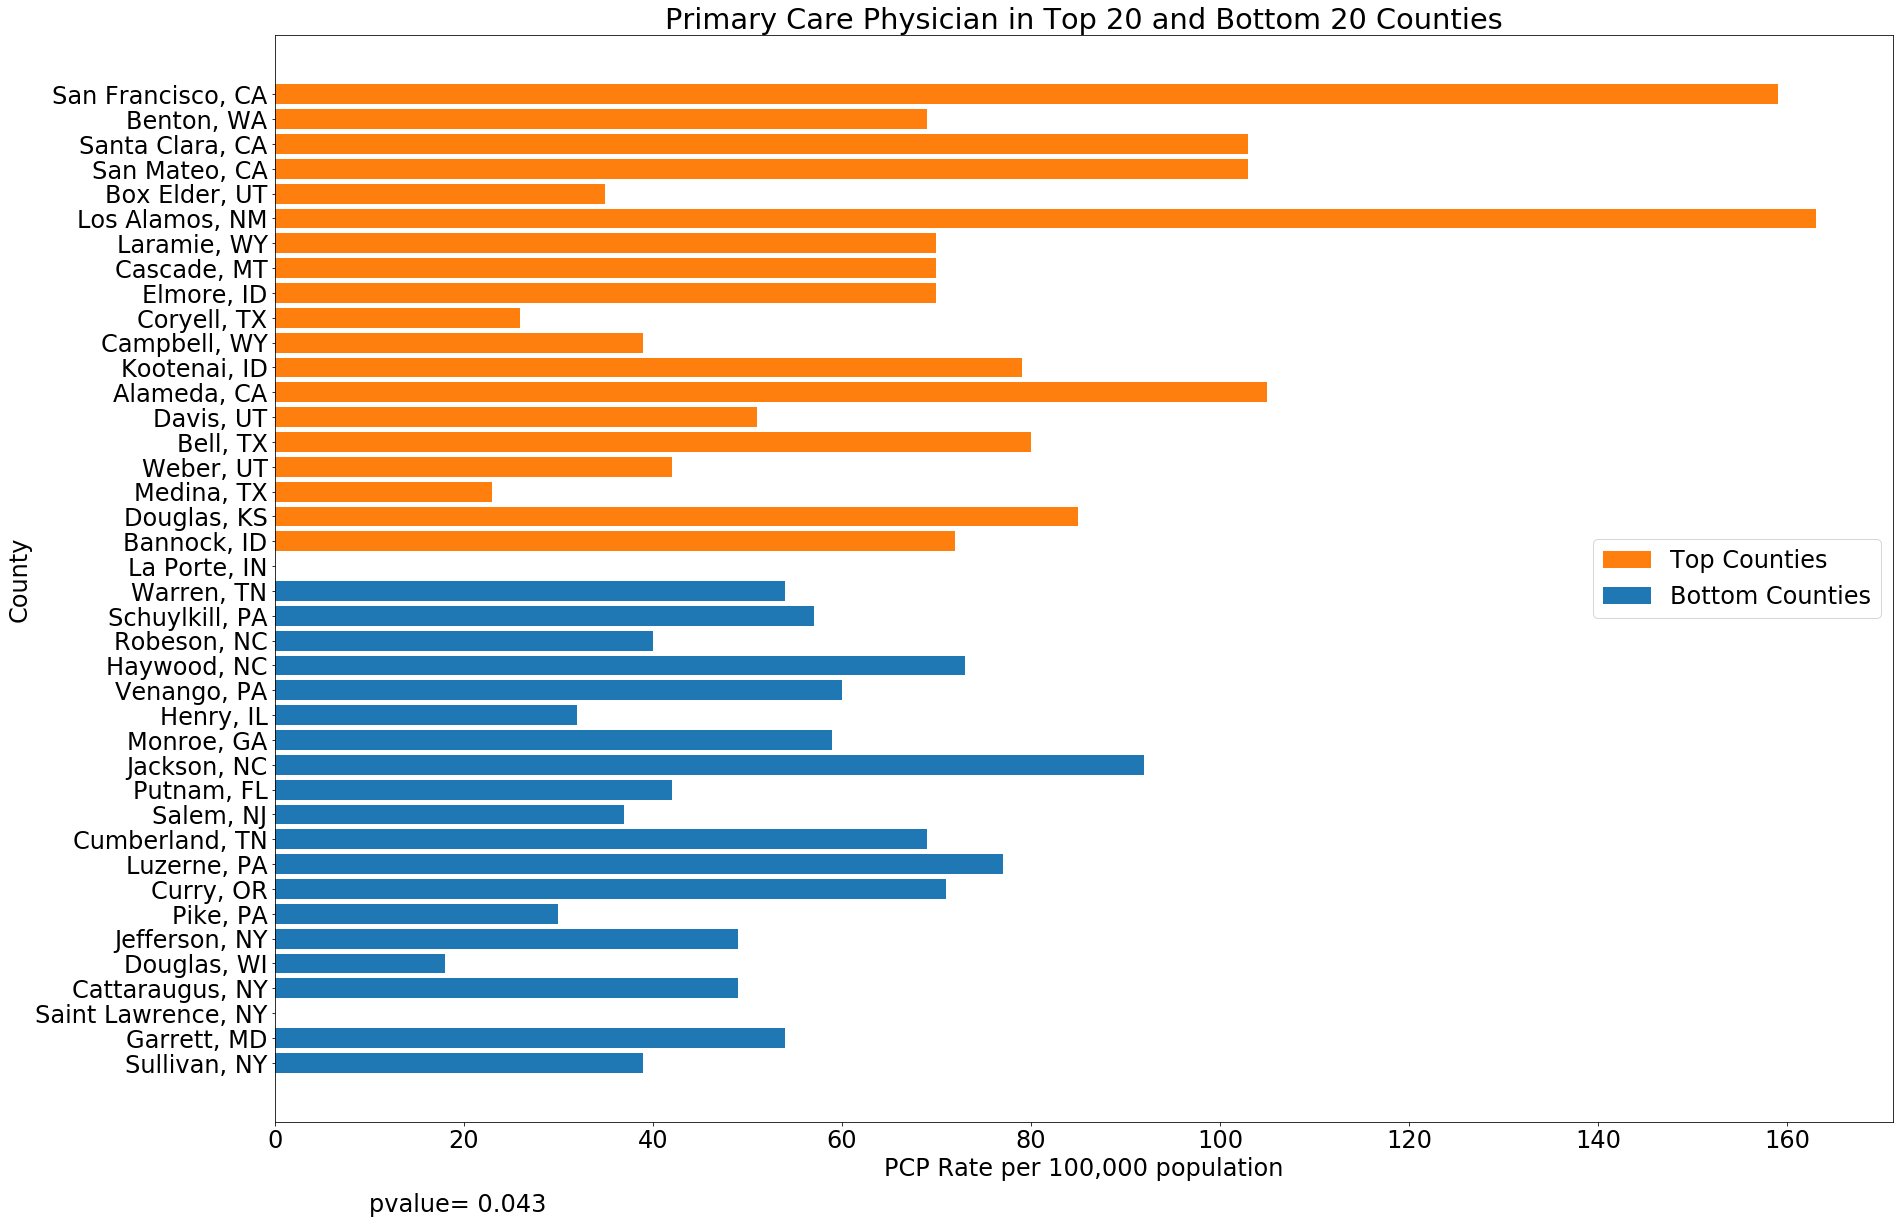

In [18]:
# Plot
plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['PCP Rate'])
top_plot=plt.barh(top_county_data['County'], top_county_data['PCP Rate'])
plt.title("Primary Care Physician in Top 20 and Bottom 20 Counties")
plt.xlabel("PCP Rate per 100,000 population")
plt.ylabel("County")
plt.text(10,-6,"pvalue= " + pvalue_PCP_Rate)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='right') 
plt.savefig("plot/plot_SL_PCP.png")
plt.show()

# Dentist Rate
dentist per 100,000 population

In [19]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]
dentist_rate_df.head()

,County,Dentist Rate
0,"Autauga, AL",32.0
1,"Baldwin, AL",49.0
2,"Barbour, AL",35.0
3,"Bibb, AL",22.0
4,"Blount, AL",19.0


In [20]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data.head()

,County,Dentist Rate
0,"Sullivan, NY",39.0
1,"Garrett, MD",41.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",41.0
4,"Douglas, WI",51.0


In [21]:
# Get p-value
pop1 = top_county_data['Dentist Rate']
pop2= bottom_county_data['Dentist Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
ttest_Dentist=stats.ttest_ind(pop1, pop2, equal_var=False)


# Get p-value to look cleaner
if ttest_Dentist[1] <0.001:
    pvalue_dentist = '{0:.1e}'.format(ttest_Dentist[1])
else:
    pvalue_uninsured = '{0:.3f}'.format(ttest_Dentist[1])
pvalue_dentist





'6.3e-04'

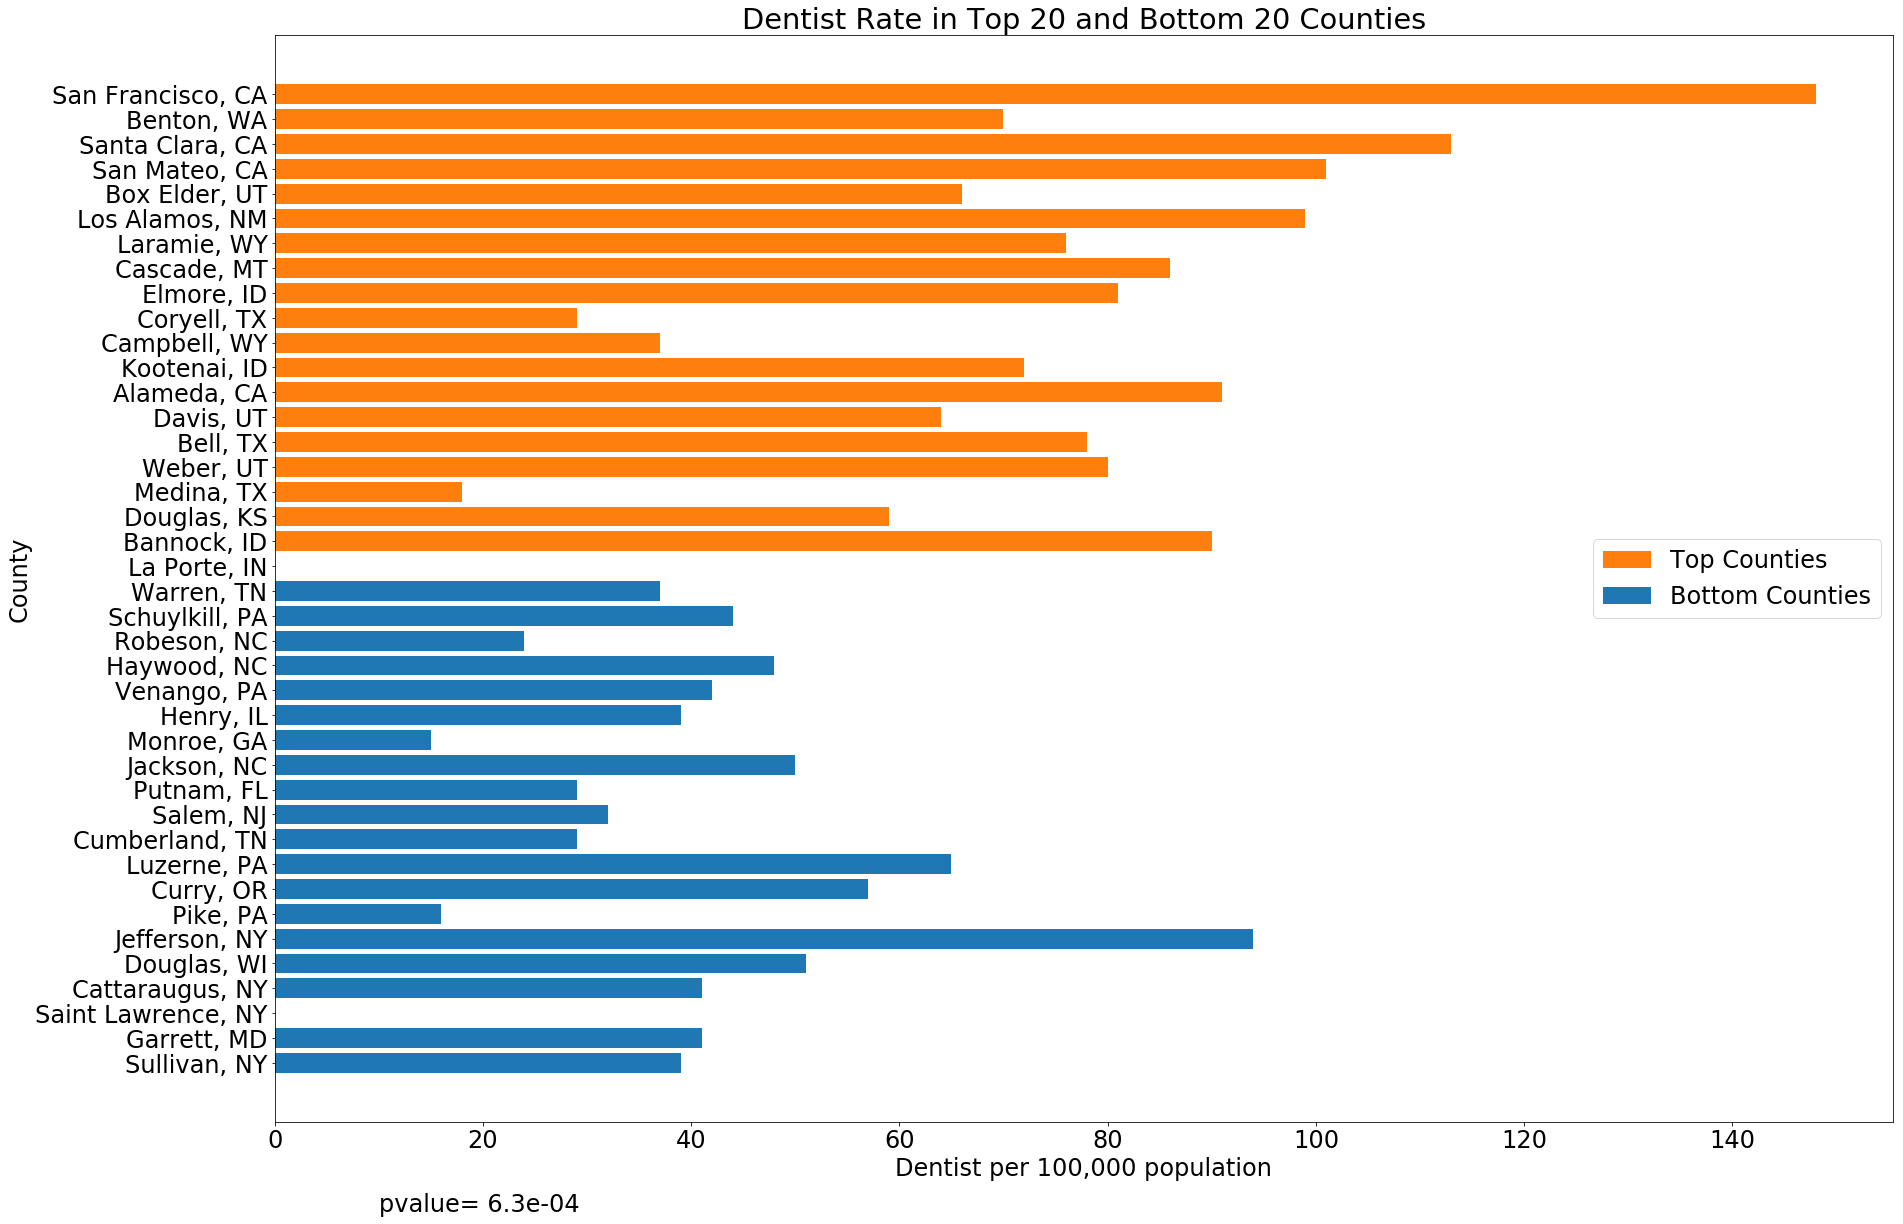

In [22]:
# Plot

plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['Dentist Rate'])
top_plot=plt.barh(top_county_data['County'], top_county_data['Dentist Rate'])
plt.title("Dentist Rate in Top 20 and Bottom 20 Counties")
plt.xlabel("Dentist per 100,000 population")
plt.ylabel("County")
plt.text(10,-6,"pvalue= " + pvalue_dentist)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='right') 
plt.savefig("plot/plot_SL_Dentist.png")




# MHP Rate
mental health provider per 100,000 population

In [23]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]
MHP_rate.head()

,County,MHP Rate
0,"Autauga, AL",13.0
1,"Baldwin, AL",89.0
2,"Barbour, AL",8.0
3,"Bibb, AL",9.0
4,"Blount, AL",9.0


In [24]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
bottom_county_data.head()

,County,MHP Rate
0,"Sullivan, NY",183.0
1,"Garrett, MD",116.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",111.0
4,"Douglas, WI",113.0


In [25]:
# Get p-value
pop1 = top_county_data['MHP Rate']
pop2= bottom_county_data['MHP Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
ttest_MHP=stats.ttest_ind(pop1, pop2, equal_var=False)

# Get p-value to look cleaner
if ttest_MHP[1] <0.001:
    pvalue_MHP = '{0:.1e}'.format(ttest_MHP[1])
else:
    pvalue_MHP = '{0:.3f}'.format(ttest_MHP[1])
pvalue_MHP


'0.018'

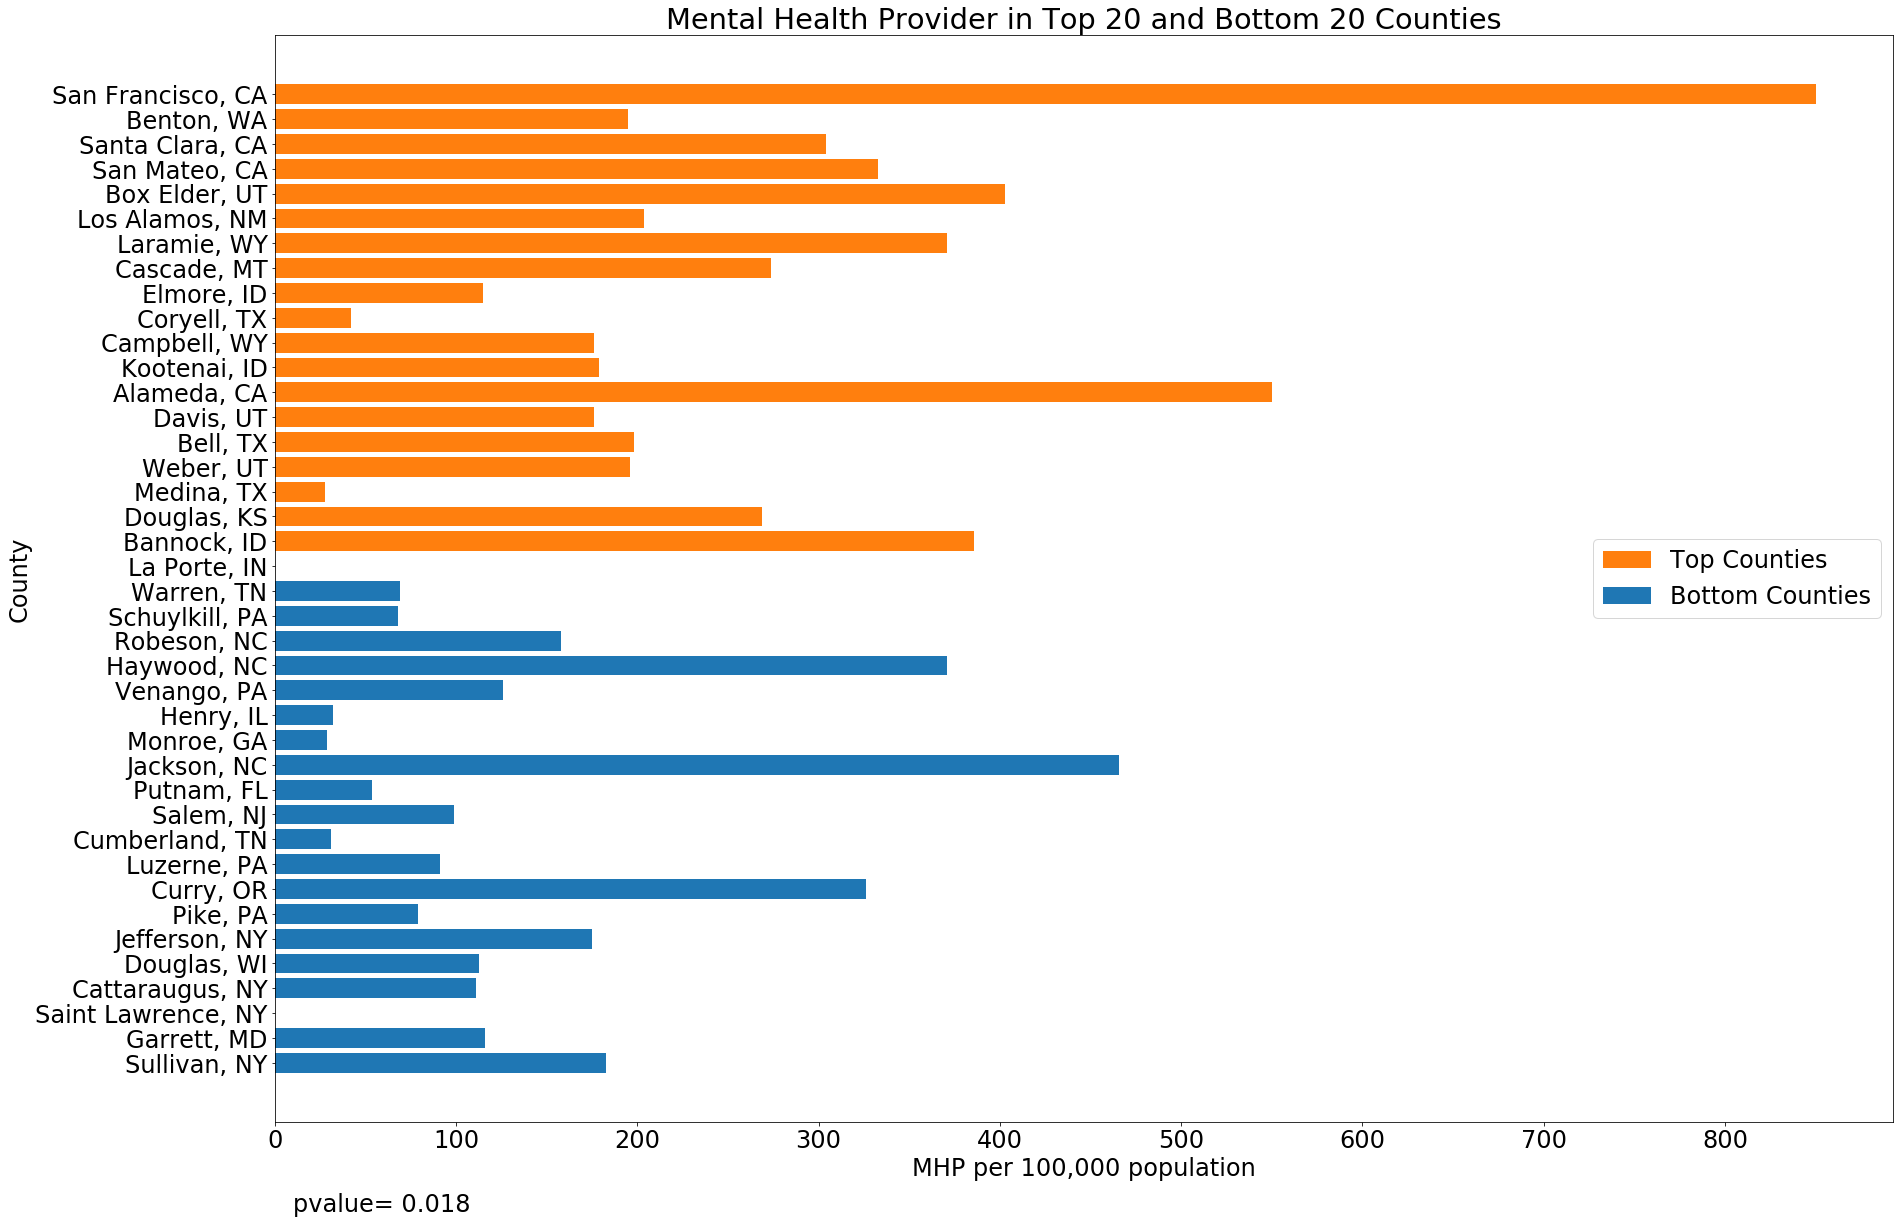

In [26]:
# Plot

plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['MHP Rate'])
top_plot=plt.barh(top_county_data['County'], top_county_data['MHP Rate'])
plt.title("Mental Health Provider in Top 20 and Bottom 20 Counties")
plt.xlabel("MHP per 100,000 population")
plt.ylabel("County")
plt.text(10,-6,"pvalue= " + pvalue_MHP)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='right') 
plt.savefig("plot/plot_SL_MHP.png")
#plt.show()




# Percent Smokers

In [27]:
# Get specific health factor data

smokers = health_factor_df[["County", "% Smokers"]]
smokers.head()

,County,% Smokers
0,"Autauga, AL",19
1,"Baldwin, AL",17
2,"Barbour, AL",22
3,"Bibb, AL",20
4,"Blount, AL",20


In [28]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, smokers, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, smokers, on='County', how='left')
bottom_county_data.head()

,County,% Smokers
0,"Sullivan, NY",18.0
1,"Garrett, MD",16.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",23.0
4,"Douglas, WI",17.0


In [29]:
# Get p-value
pop1 = top_county_data['% Smokers']
pop2= bottom_county_data['% Smokers']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
ttest_smoker=stats.ttest_ind(pop1, pop2, equal_var=False)

# Get p-value to look cleaner
if ttest_smoker[1] <0.001:
    pvalue_smoker = '{0:.1e}'.format(ttest_smoker[1])
else:
    pvalue_smoker = '{0:.3f}'.format(ttest_smoker[1])
pvalue_smoker

'0.003'

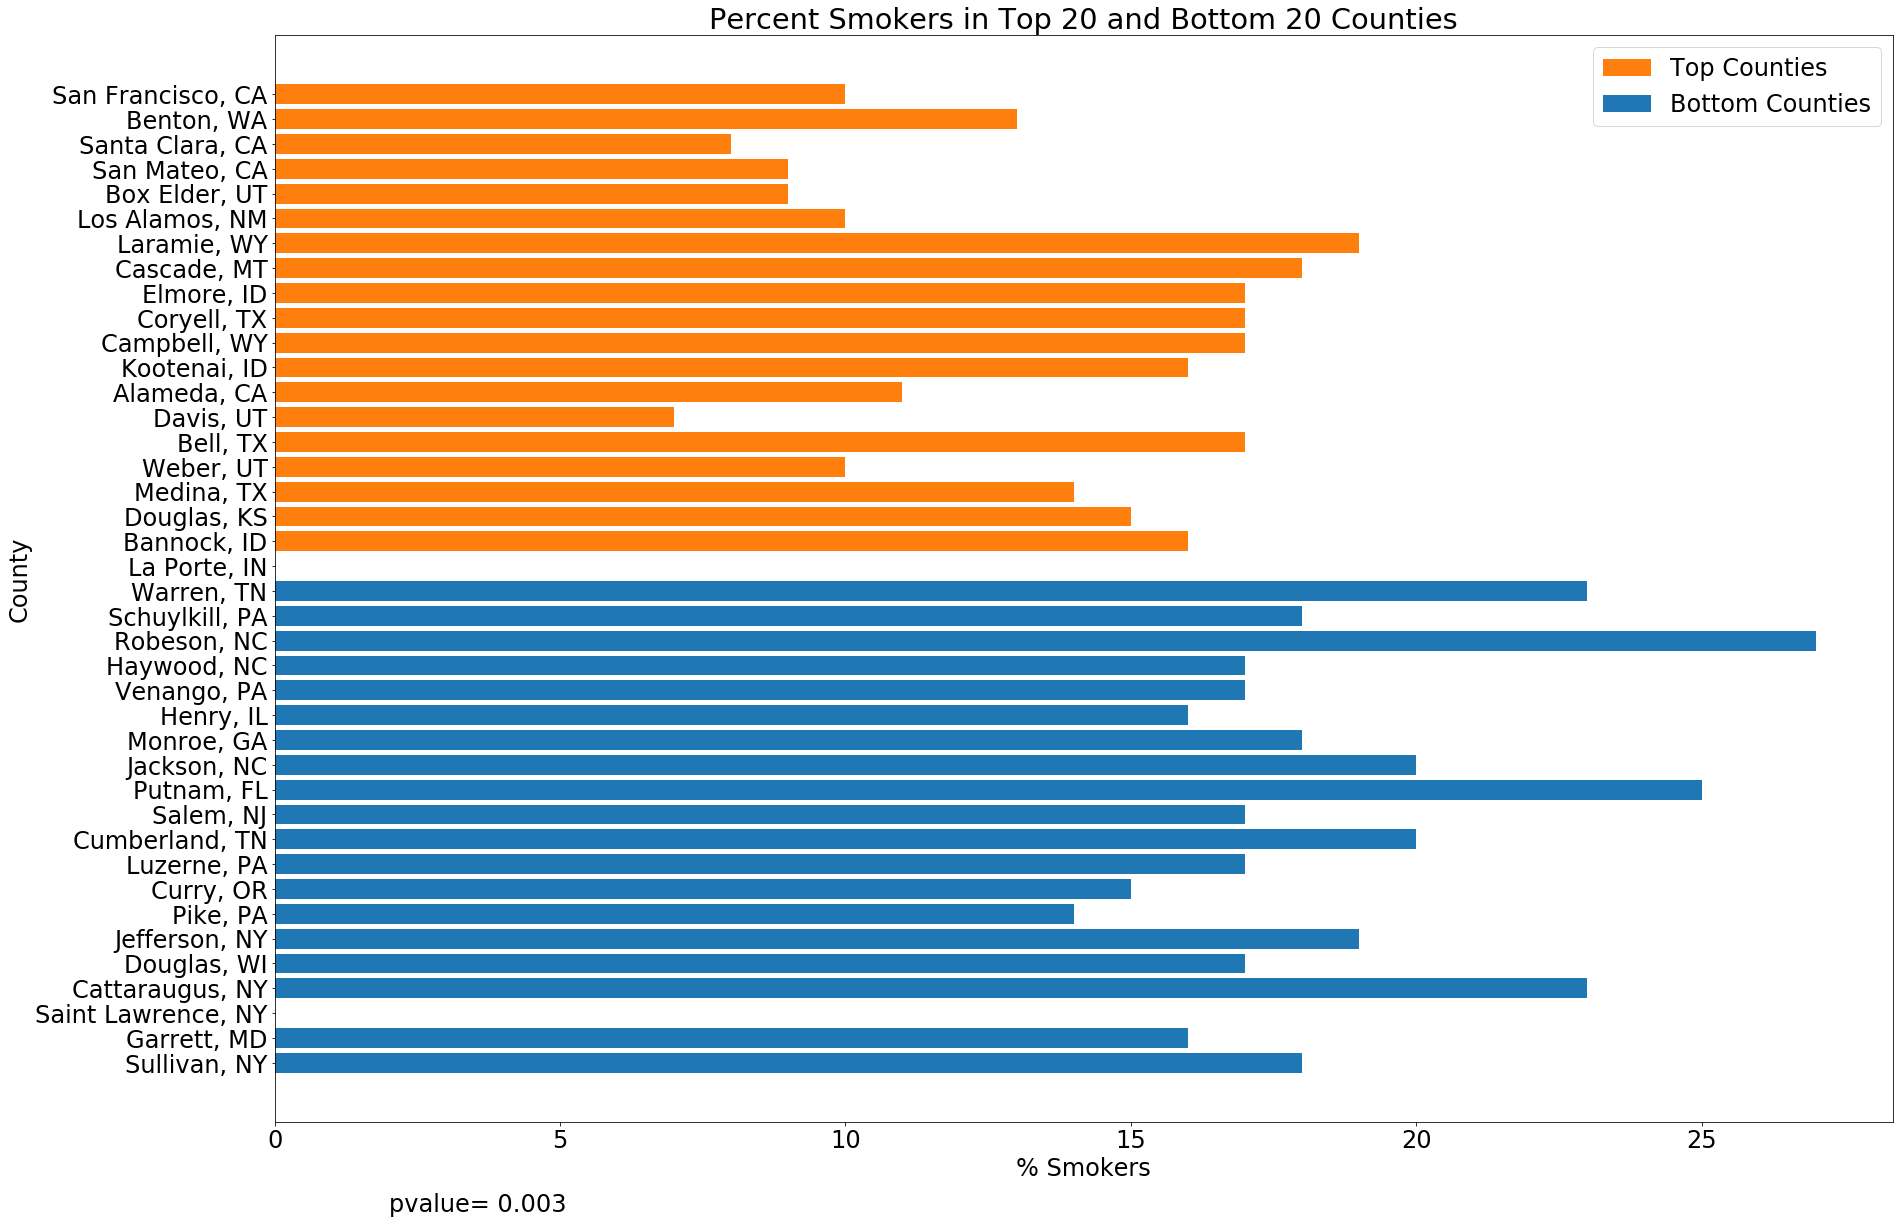

In [30]:
# Plot

plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['% Smokers'])
top_plot=plt.barh(top_county_data['County'], top_county_data['% Smokers'])
plt.title("Percent Smokers in Top 20 and Bottom 20 Counties")
plt.xlabel("% Smokers")
plt.ylabel("County")
plt.text(2,-6,"pvalue= " + pvalue_smoker)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='upper right') 
plt.savefig("plot/plot_SL_Smokers.png")
#plt.show()




# Adult Obesity
- Percentage of adults that report BMI >= 30

In [31]:
# Get specific health factor data

obese = health_factor_df[["County", "% Obese"]]
obese.head()

,County,% Obese
0,"Autauga, AL",36
1,"Baldwin, AL",29
2,"Barbour, AL",44
3,"Bibb, AL",38
4,"Blount, AL",36


In [32]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, obese, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, obese, on='County', how='left')
bottom_county_data.head()

,County,% Obese
0,"Sullivan, NY",30.0
1,"Garrett, MD",31.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",28.0
4,"Douglas, WI",32.0


In [33]:
# Get p-value
pop1 = top_county_data['% Obese']
pop2= bottom_county_data['% Obese']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
ttest_obese=stats.ttest_ind(pop1, pop2, equal_var=False)

# Get p-value to look cleaner
if ttest_obese[1] <0.001:
    pvalue_obese = '{0:.1e}'.format(ttest_obese[1])
else:
    pvalue_obese = '{0:.3f}'.format(ttest_obese[1])
pvalue_obese


'0.046'

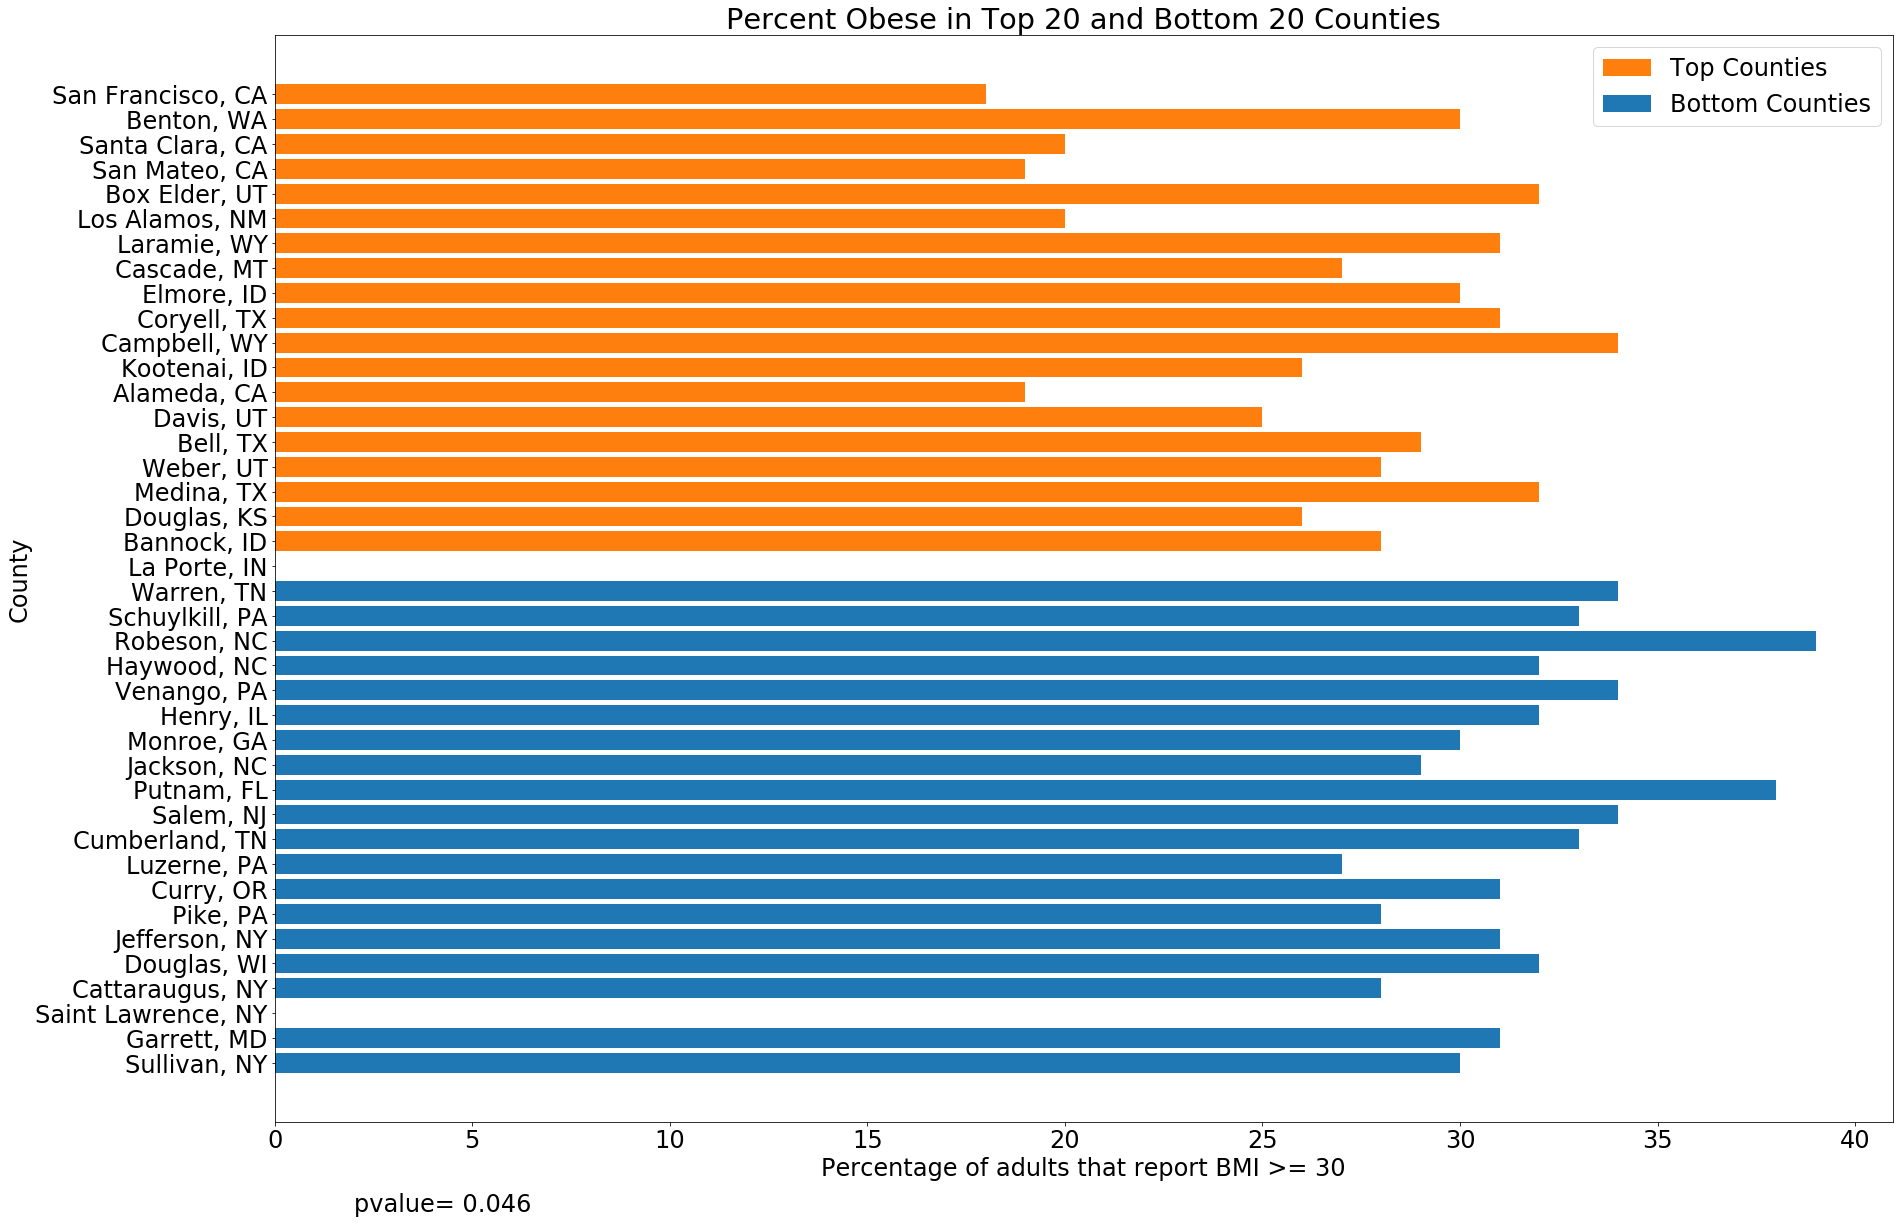

In [34]:
# Plot
plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['% Obese'])
top_plot=plt.barh(top_county_data['County'], top_county_data['% Obese'])
plt.title("Percent Obese in Top 20 and Bottom 20 Counties")
plt.xlabel("Percentage of adults that report BMI >= 30")
plt.ylabel("County")
plt.text(2,-6,"pvalue= " + pvalue_obese)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='upper right') 
plt.savefig("plot/plot_SL_obese.png")




# Teen Birth Rate
- Births per 1,000 females ages 15-19

In [35]:
# Get specific health factor data

teen_birth = health_factor_df[["County", "Teen Birth Rate"]]
teen_birth.head()

,County,Teen Birth Rate
0,"Autauga, AL",28.0
1,"Baldwin, AL",32.0
2,"Barbour, AL",50.0
3,"Bibb, AL",47.0
4,"Blount, AL",40.0


In [36]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, teen_birth, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, teen_birth, on='County', how='left')
bottom_county_data.head()

,County,Teen Birth Rate
0,"Sullivan, NY",23.0
1,"Garrett, MD",30.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",28.0
4,"Douglas, WI",22.0


In [37]:
# Get p-value
pop1 = top_county_data['Teen Birth Rate']
pop2= bottom_county_data['Teen Birth Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
ttest_teenB=stats.ttest_ind(pop1, pop2, equal_var=False)

# Get p-value to look cleaner
if ttest_teenB[1] <0.001:
    pvalue_teenB ='{0:.1e}'.format(ttest_teenB[1])
else:
    pvalue_teenB = '{0:.3f}'.format(ttest_teenB[1])
pvalue_teenB

 

'0.222'

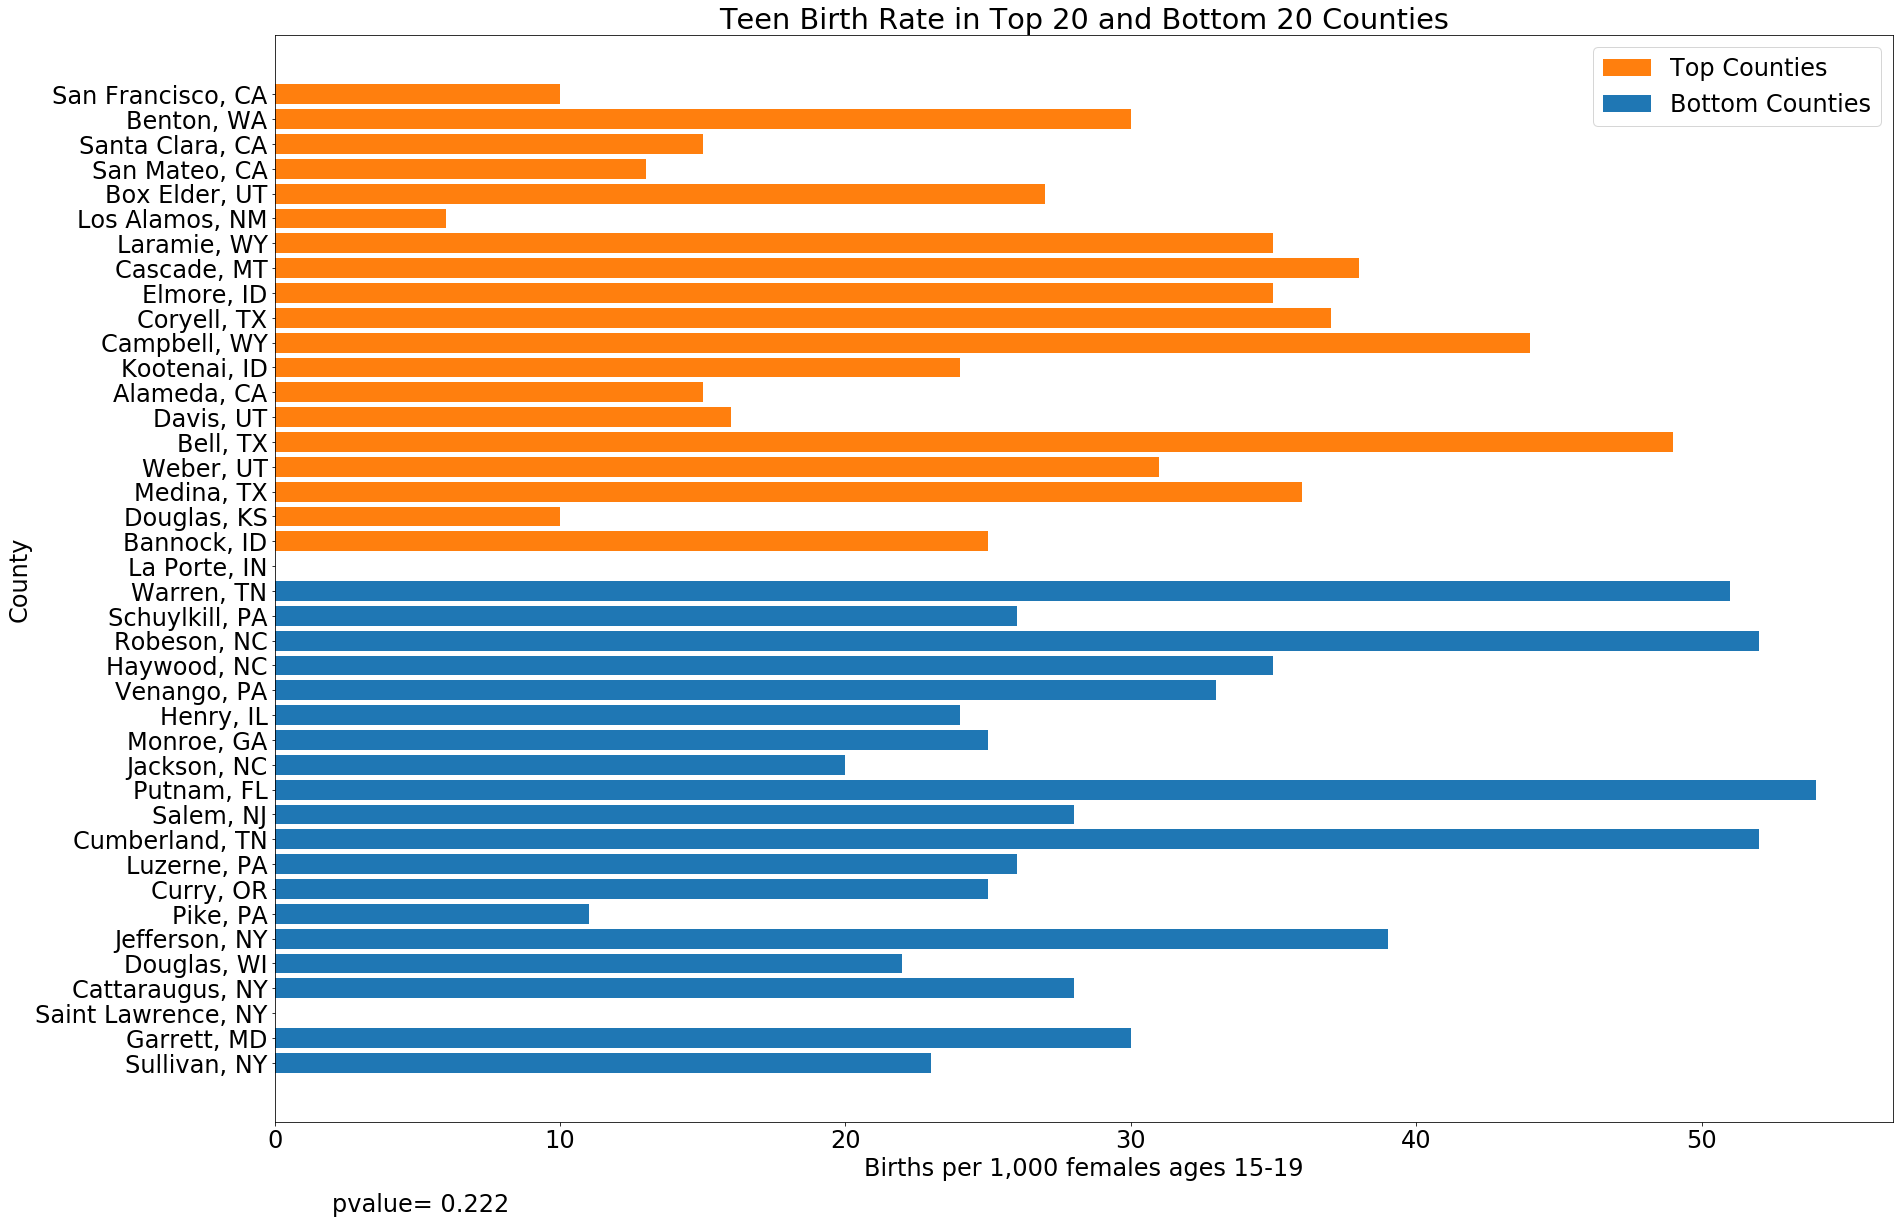

In [38]:
# Plot
plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['Teen Birth Rate'])

top_plot=plt.barh(top_county_data['County'], top_county_data['Teen Birth Rate'])
plt.title("Teen Birth Rate in Top 20 and Bottom 20 Counties")
plt.xlabel("Births per 1,000 females ages 15-19")
plt.ylabel("County")
plt.text(2,-6,"pvalue= " + pvalue_teenB)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='upper right') 
plt.savefig("plot/plot_SL_TeenBirth.png")


# Percent Low Birth Weight
- Percentage of births with low birth weight (<2500g)

In [39]:
# Get specific health factor data

LBW = health_factor_df[["County", "% LBW"]]
LBW.head()

,County,% LBW
0,"Autauga, AL",9.0
1,"Baldwin, AL",8.0
2,"Barbour, AL",12.0
3,"Bibb, AL",11.0
4,"Blount, AL",8.0


In [40]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, LBW, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, LBW, on='County', how='left')
bottom_county_data.head()

,County,% LBW
0,"Sullivan, NY",9.0
1,"Garrett, MD",8.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",8.0
4,"Douglas, WI",6.0


In [41]:
# Get p-value
pop1 = top_county_data['% LBW']
pop2= bottom_county_data['% LBW']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
ttest_LBW=stats.ttest_ind(pop1, pop2, equal_var=False)


# Get p-value to look cleaner
if ttest_LBW[1] <0.001:
    pvalue_LBW ='{0:.1e}'.format(ttest_LBW[1])
else:
    pvalue_LBW = '{0:.3f}'.format(ttest_LBW[1])
pvalue_LBW



'0.265'

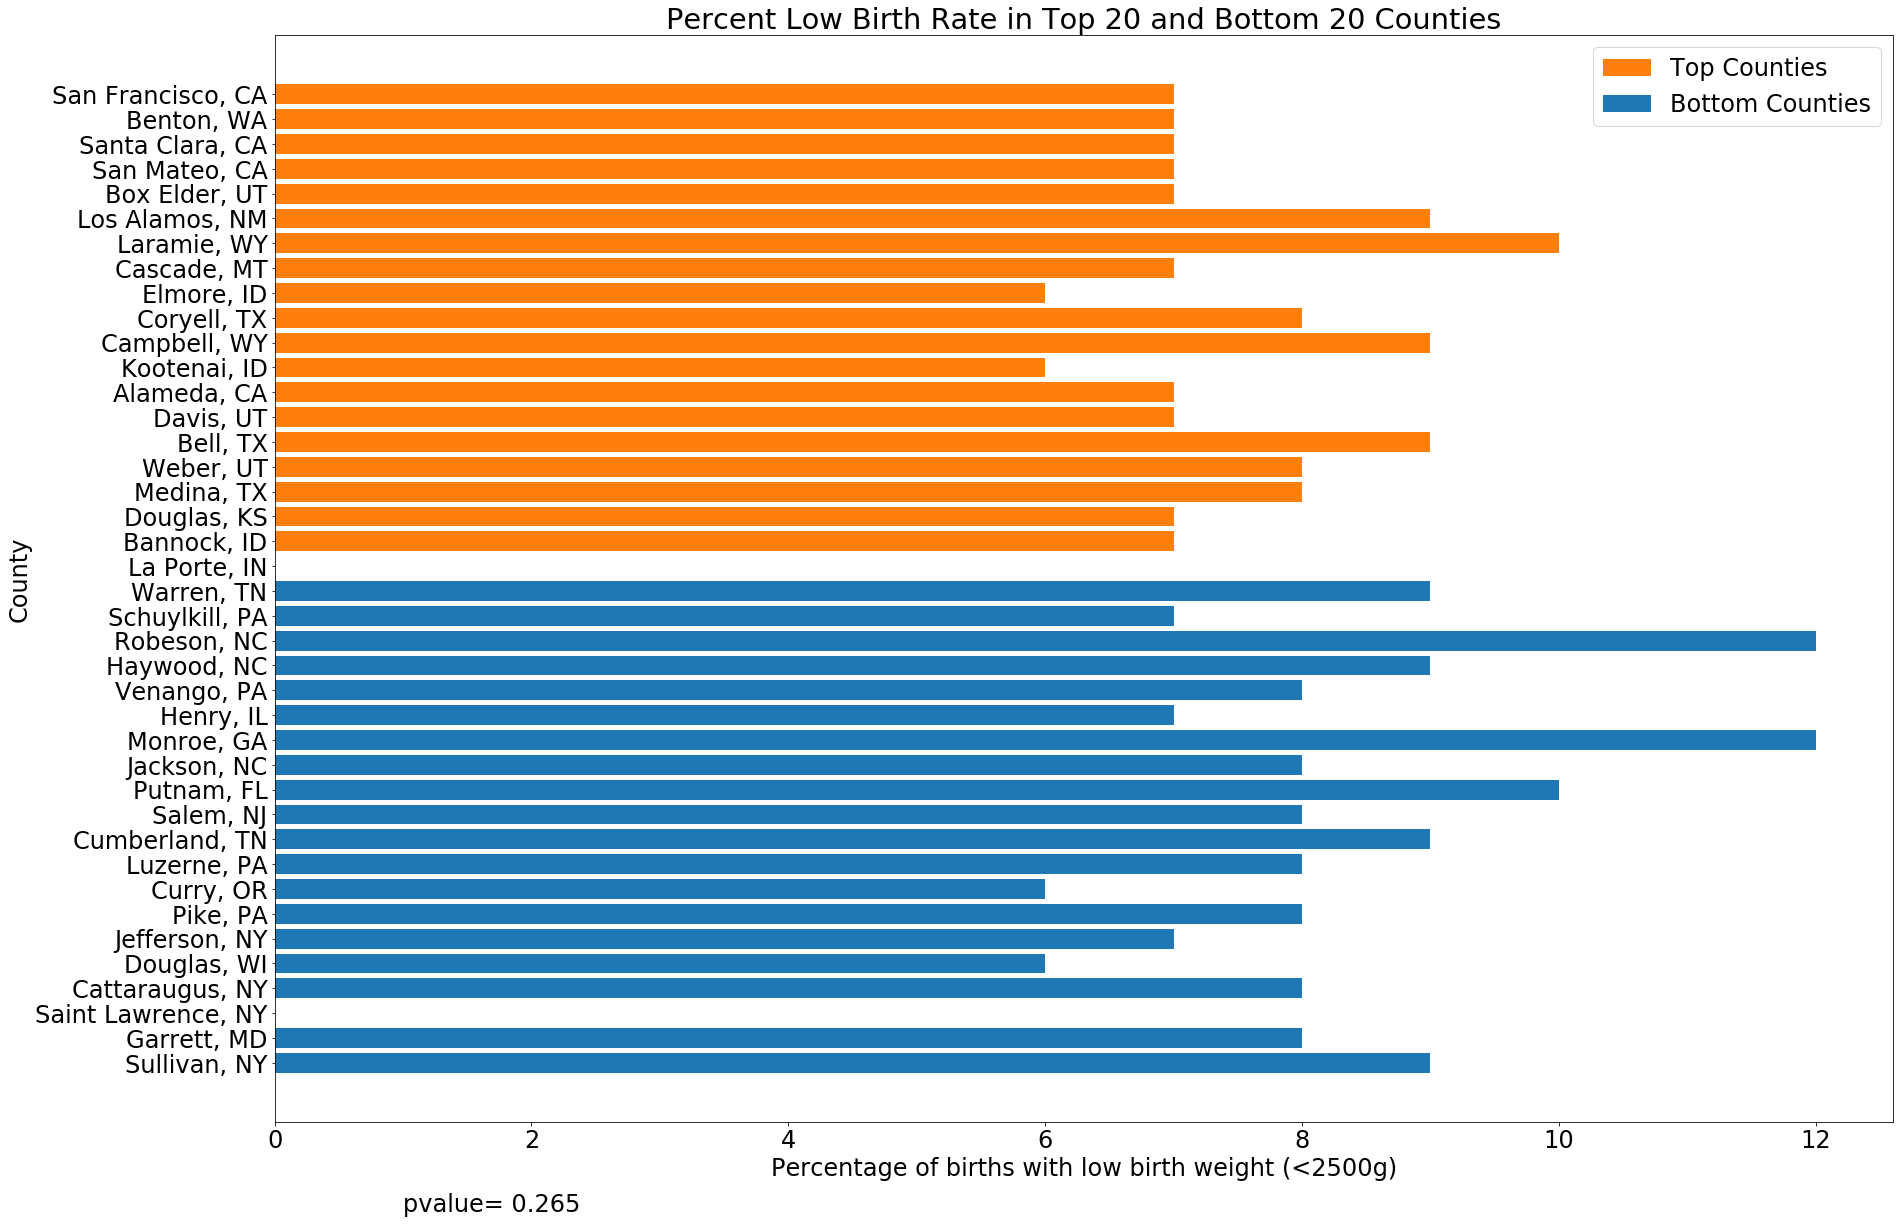

In [42]:
# Plot
plt.figure(figsize=(29,20))
plt.rcParams.update({'font.size': 24})
bottom_plot=plt.barh(bottom_county_data['County'], bottom_county_data['% LBW'])
top_plot=plt.barh(top_county_data['County'], top_county_data['% LBW'])
plt.title("Percent Low Birth Rate in Top 20 and Bottom 20 Counties")
plt.xlabel("Percentage of births with low birth weight (<2500g)")
plt.ylabel("County")
plt.text(1,-6,"pvalue= " + pvalue_LBW)
plt.legend((top_plot, bottom_plot), ("Top Counties", "Bottom Counties"), loc='upper right')
plt.savefig("plot/plot_SL_LBW.png")

